<a href="https://colab.research.google.com/github/ebrahimisoheil/IMDB-Review-Classifying-Keras/blob/master/Classifying_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **A set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.** 

### Loading the IMDB Dataset
import dataset from keras builtin datasets and split it into train and test



In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


The argument num_words=10000 means you’ll only keep the top 10,000 most fre-
quently occurring words in the training data. Rare words will be discarded. This allows
you to work with vector data of manageable size.

###### word indices (encoding a sequence of words). train_labels and test_labels are
###### lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [0]:
train_data[0][1:5]

[14, 22, 16, 43]

In [0]:
#lists of 0s and 1s, where 0 stands for negative and 1 stands for positive
train_labels[1:5]

array([0, 0, 1, 0])

Because you’re restricting yourself to the top 10,000 most frequent words, no word
index will exceed 10,000:

In [0]:
max([max(sequence) for sequence in train_data])

9999

For kicks, here’s how you can quickly decode one of these reviews back to English
words:

In [0]:
#word_index is a dictionary mapping words to an integer index.
word_index = imdb.get_word_index()
#Reverses it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#Decodes the review. 
#Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 1s 0us/step


### Encoding the integer sequences into a binary matrix

In [0]:
def vectorize_sequences(sequences, dimension = 10000):
# Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
# Sets specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results

In [0]:
import numpy as np
# Vectorized training data
x_train = vectorize_sequences(train_data)
# Vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
# Shape of our train and test data after vectorizing
print('Train Data is of shape:'+ str(x_train.shape))
print('Test Data is of shape:'+ str(x_test.shape))

Train Data is of shape:(25000, 10000)
Test Data is of shape:(25000, 10000)


#### vectorize labels, which is straightforward:

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')
# Shape of our train and test lables after vectorizing
print('Train label is of shape:'+ str(y_train.shape))
print('Test label is of shape:'+ str(y_test.shape))

Train label is of shape:(25000,)
Test label is of shape:(25000,)


Now the data is ready to be fed into a neural network:

### The model definition:

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = tf.keras.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(10, activation = 'relu' ))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Compiling the model: you need to choose a loss function and an optimizer

In [0]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Configuring the optimizer

In [0]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

### Using custom losses and metrics

In [0]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

### Setting aside a validation set

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training  model

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 480us/sample - loss: 0.3254 - acc: 0.8752 - val_loss: 0.2969 - val_acc: 0.8772
Epoch 2/20
15000/15000 [==============================] - 7s 466us/sample - loss: 0.1939 - acc: 0.9231 - val_loss: 0.2883 - val_acc: 0.8853
Epoch 3/20
15000/15000 [==============================] - 7s 462us/sample - loss: 0.1386 - acc: 0.9467 - val_loss: 0.3244 - val_acc: 0.8752
Epoch 4/20
15000/15000 [==============================] - 7s 461us/sample - loss: 0.0815 - acc: 0.9711 - val_loss: 0.5004 - val_acc: 0.8326
Epoch 5/20
15000/15000 [==============================] - 7s 455us/sample - loss: 0.0674 - acc: 0.9785 - val_loss: 0.3667 - val_acc: 0.8823
Epoch 6/20
15000/15000 [==============================] - 7s 451us/sample - loss: 0.0203 - acc: 0.9959 - val_loss: 0.4745 - val_acc: 0.8803
Epoch 7/20
15000/15000 [==============================] - 7s 449us/sample - loss: 0.0578 - acc: 0.9843 - val_l

the call to model.fit() returns a History object. This object has a member history , which is a dictionary containing data about everything that happened
during training.

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### Plotting the training and validation loss

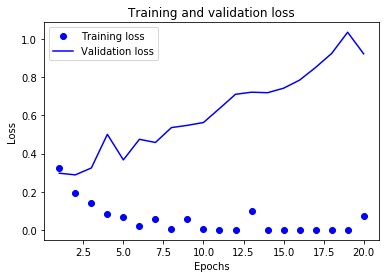

In [0]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
#“bo” is for “blue dot.”
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#“b” is for “solid blue line.”
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting the training and validation accuracy

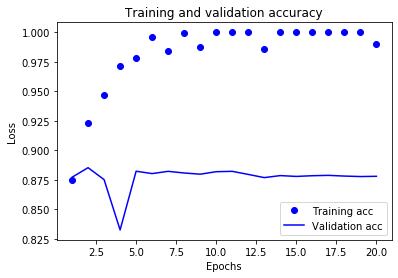

In [0]:
#Clears the figure
plt.clf()
acc_values = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Retraining a model from scratch

In [0]:
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
#The final results are as follows:
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 3s 134us/sample - loss: 0.4530 - acc: 0.8246
Epoch 2/4
25000/25000 [==============================] - 2s 75us/sample - loss: 0.2625 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 2s 76us/sample - loss: 0.2044 - acc: 0.9292
Epoch 4/4
25000/25000 [==============================] - 2s 91us/sample - loss: 0.2925 - acc: 0.8846


In [0]:
#The final results are as follows:
print('Accuracy: '+str(results[1]))

Accuracy: 0.88456


In [0]:
#After having trained a network, you’ll want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the predict method:
model.predict(x_test)

array([[0.22333229],
       [0.99930346],
       [0.9615973 ],
       ...,
       [0.13239264],
       [0.0911991 ],
       [0.77522427]], dtype=float32)